In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("breast-cancer.csv")

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### 1. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require? 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


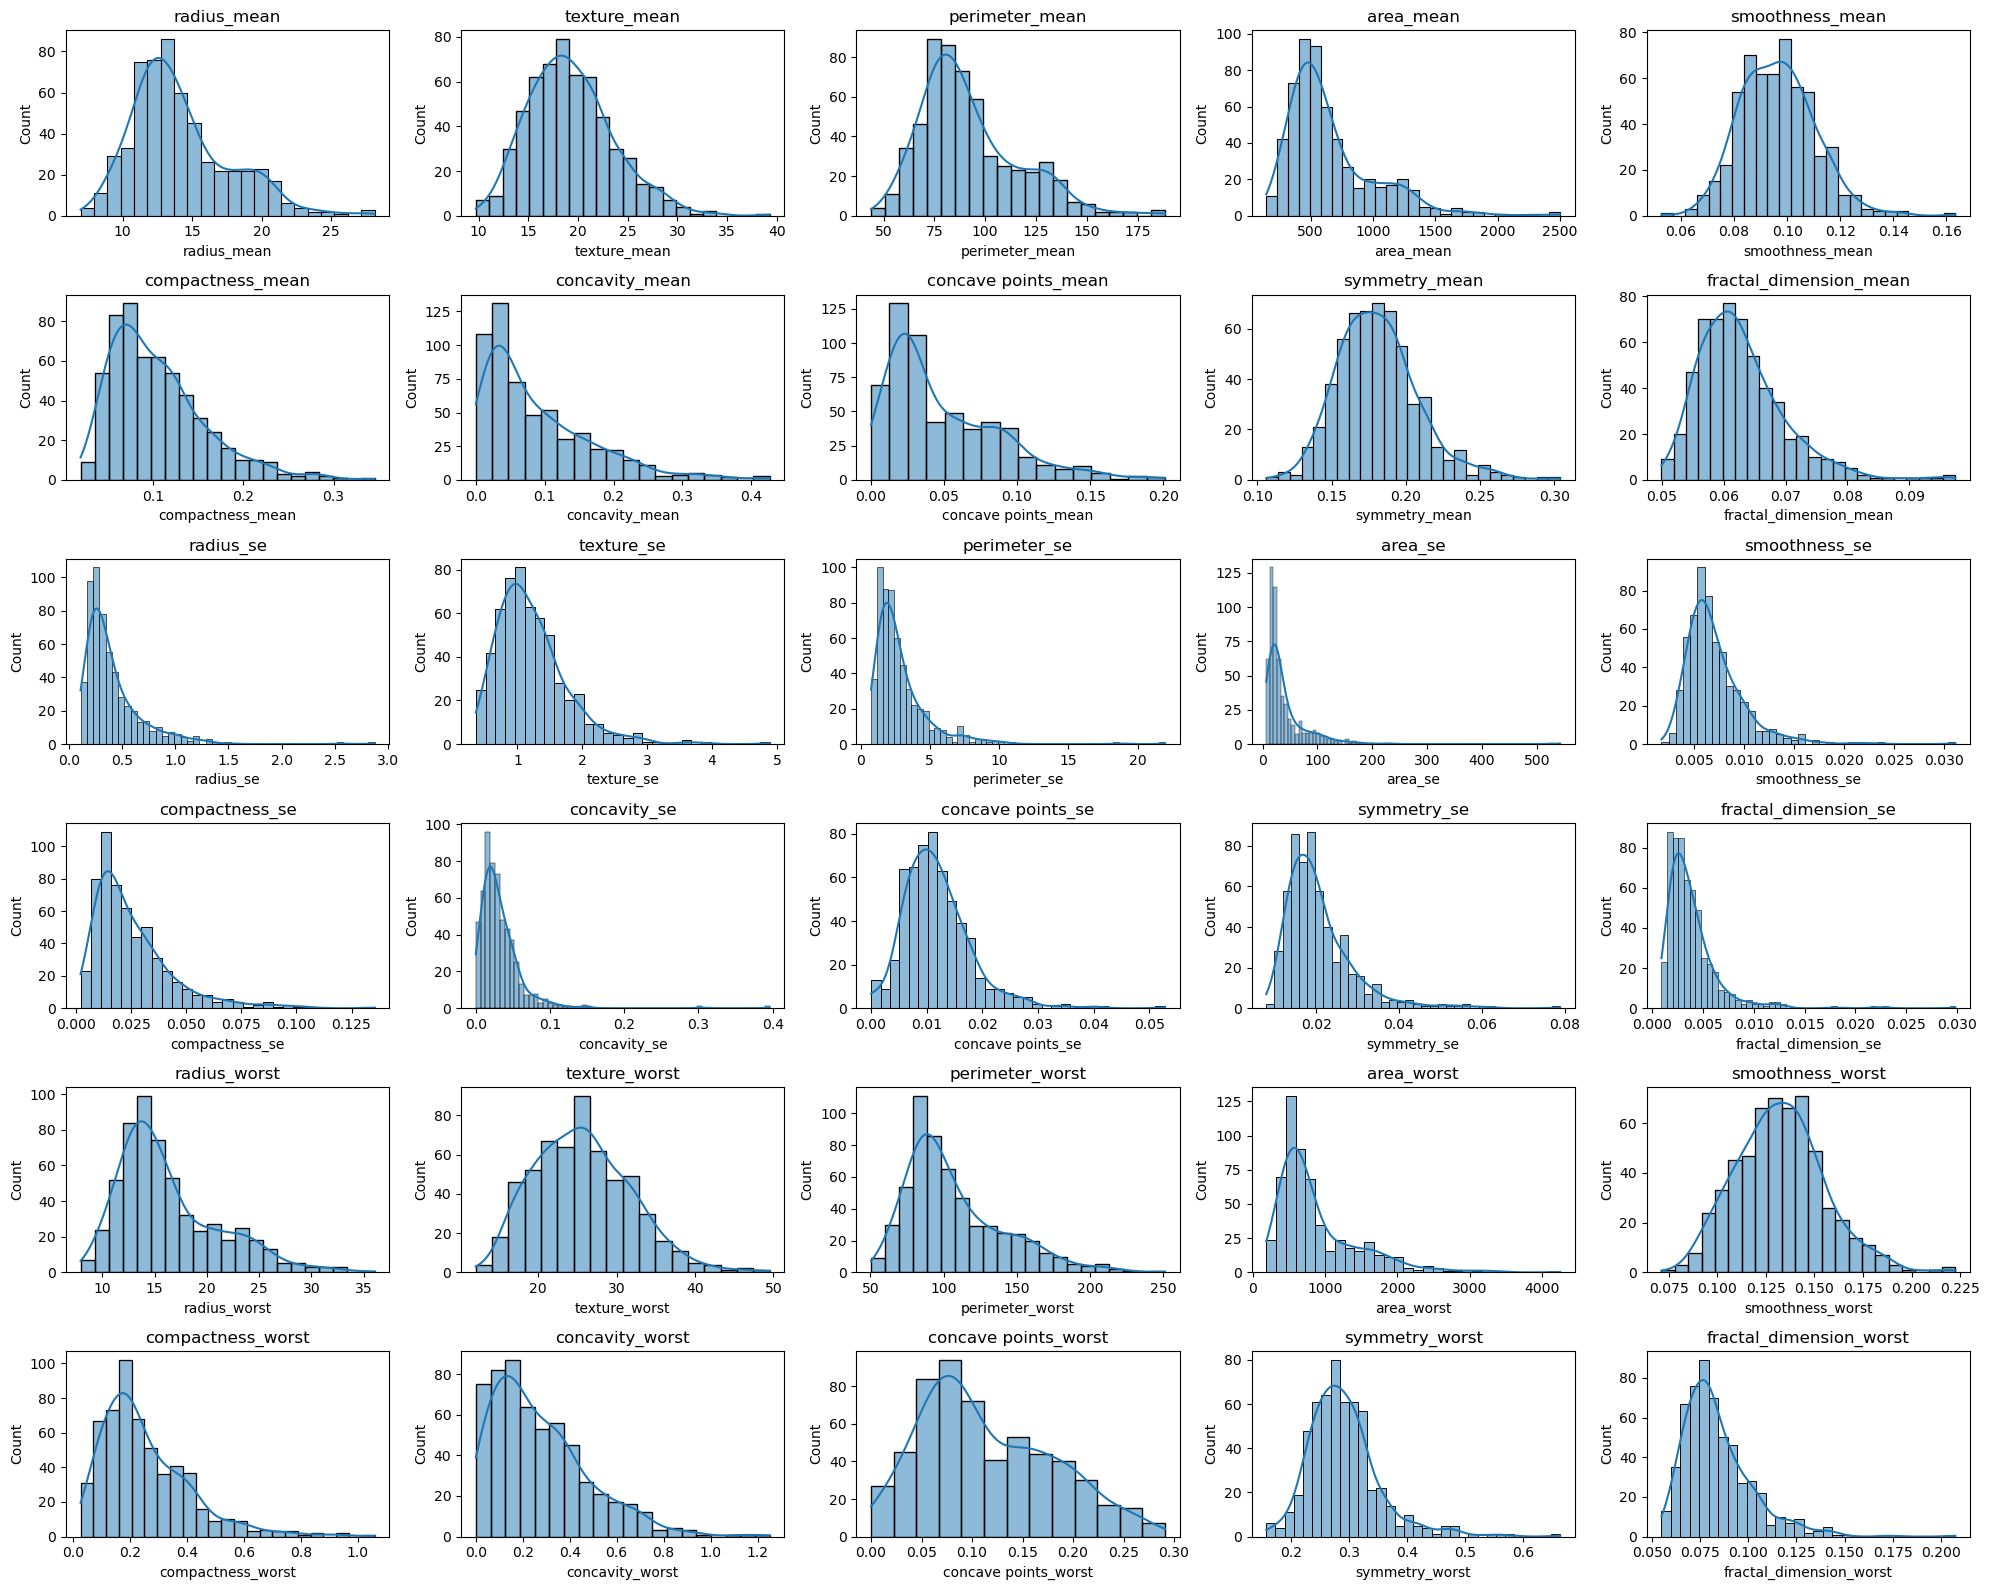

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the 'id' column as it's not a feature
data.drop('id', axis=1, inplace=True)

# Display statistical values
stat_values = data.describe()

# Visualize the distributions with histograms
plt.figure(figsize=(20, 16))
for i, column in enumerate(data.columns[1:], 1):  # Start from 1 to skip the 'diagnosis' column
    plt.subplot(6, 5, i)
    sns.histplot(data[column], kde=True)
    plt.title(column)
    plt.tight_layout()

stat_values

From the statistical values and histograms of the attributes:

1. There's a significant variance in scale between the attributes. For instance, features like radius_mean, area_mean, and area_worst have larger scales compared to features such as smoothness_mean and fractal_dimension_mean.
2. Some attributes have a nearly normal distribution (e.g., radius_mean), while others are right-skewed (e.g., smoothness_mean).

Attributes that might require special treatment:

1. Scaling: Given the variance in scales, we'll need to scale the features to ensure that they're treated equally by machine learning algorithms that are sensitive to feature scales (e.g., SVM, Logistic Regression).
2. Skewness: For algorithms that assume feature normality, we may need to address the skewness in some attributes. Transformations like the logarithmic transformation can be applied to make the data more normal-like.

### 2. Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

In [5]:
data.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


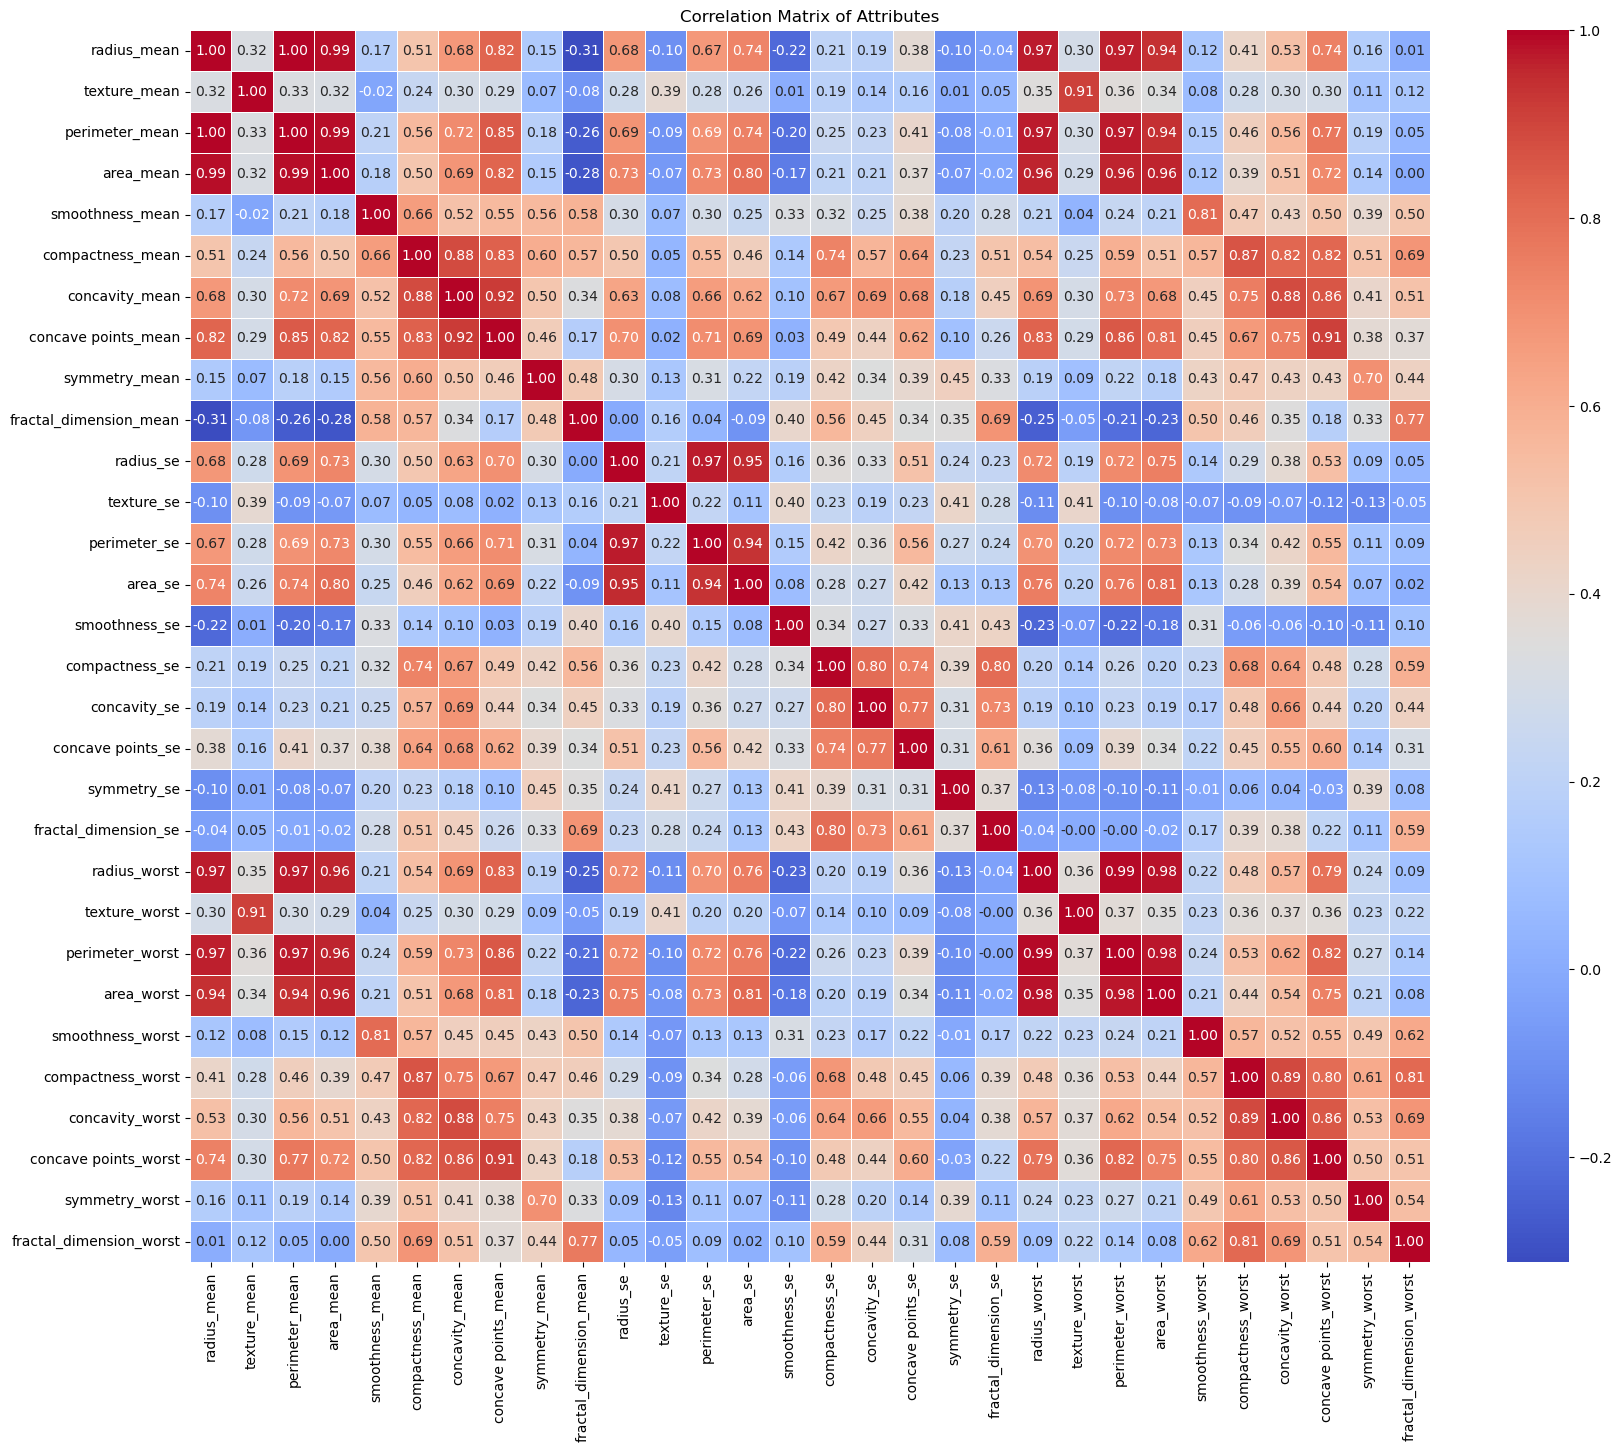

In [6]:
# Compute the Pearson Correlation Coefficient for the attributes
correlation_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Attributes')
plt.show()

The heatmap displays the Pearson Correlation Coefficient (PCC) between the attributes. Here are some observations:

1. Many features related to size (e.g., radius, perimeter, area) are strongly correlated. This is expected since these measurements are intrinsically related. For example, an increase in the radius of a cell nucleus would naturally result in an increase in its area and perimeter.
2. Features related to the shape and structure of the cell nuclei, such as compactness, concavity, and concave points, also show strong correlations amongst themselves.
3. Features like smoothness and fractal_dimension show weaker correlations with the size and structure features.

Next, let's generate scatter plots for a few pairs of attributes to visually analyze their relationships. Given the large number of features, we'll focus on a few pairs that have strong and weak correlations for illustrative purposes.

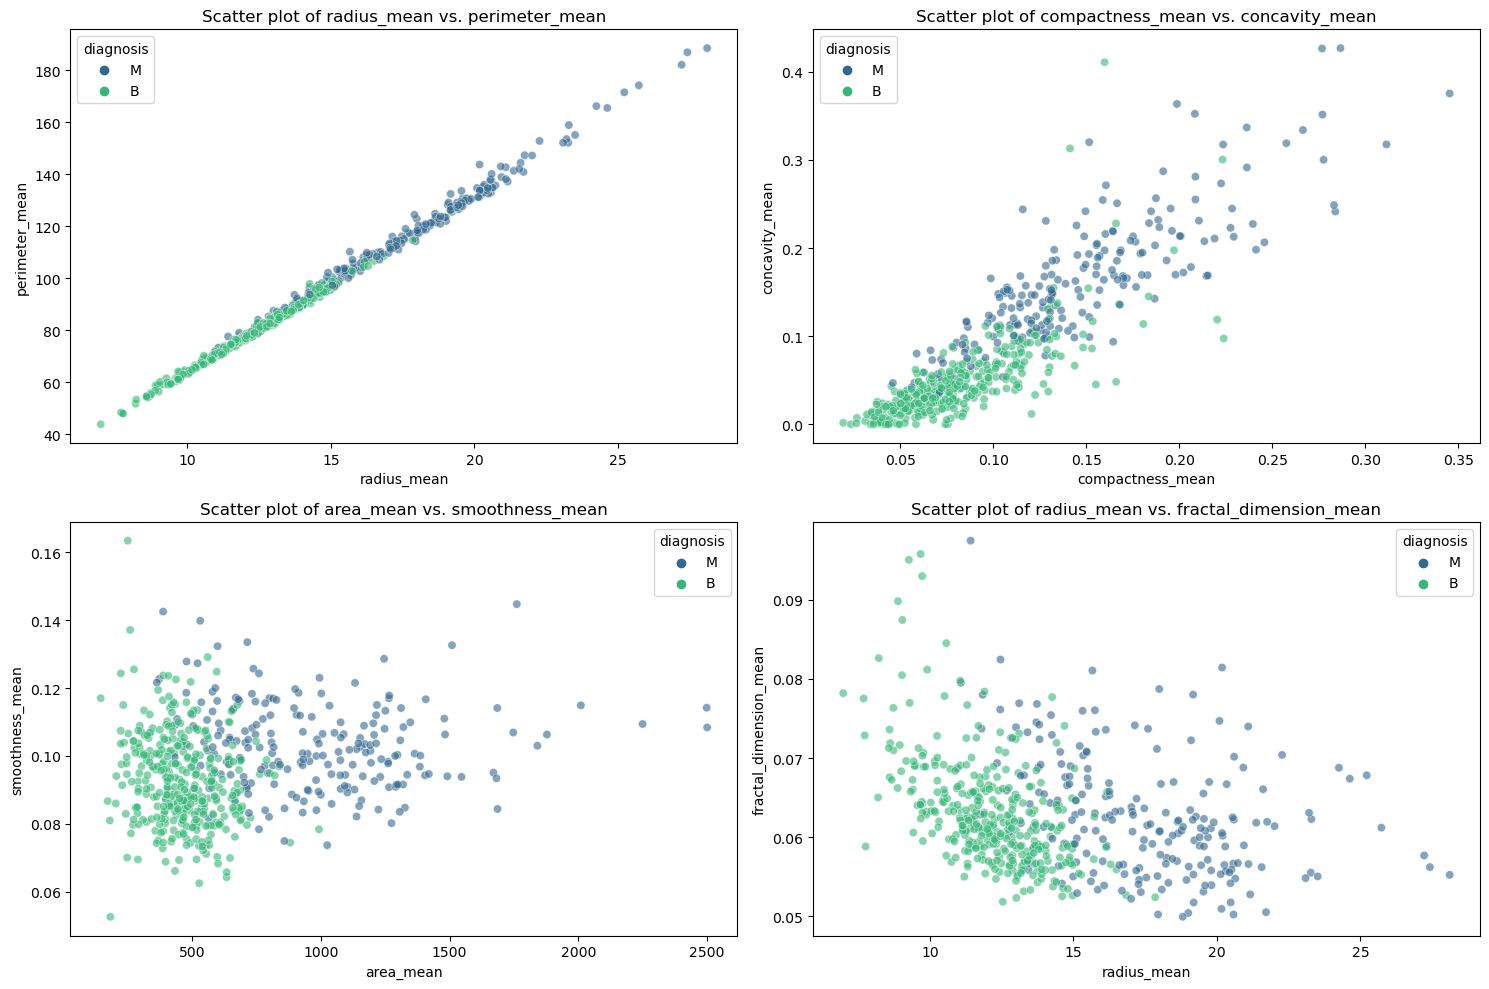

In [7]:
# Selecting a few pairs of attributes for scatter plots
pairs = [('radius_mean', 'perimeter_mean'),
         ('compactness_mean', 'concavity_mean'),
         ('area_mean', 'smoothness_mean'),
         ('radius_mean', 'fractal_dimension_mean')]

plt.figure(figsize=(15, 10))

for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=data, x=x, y=y, hue='diagnosis', palette='viridis', alpha=0.6)
    plt.title(f'Scatter plot of {x} vs. {y}')

plt.tight_layout()
plt.show()

The scatter plots provide visual insights into the relationships between selected pairs of attributes:

1. radius_mean vs. perimeter_mean: As expected from the strong correlation value, there's a clear linear relationship between these two features.
2. compactness_mean vs. concavity_mean: These two attributes also show a positive linear trend, indicating that as compactness increases, concavity tends to increase as well.
3. area_mean vs. smoothness_mean: There isn't a clear linear relationship between these two attributes. Their correlation is weaker compared to the previous pairs.
4. radius_mean vs. fractal_dimension_mean: This scatter plot also doesn't show a strong linear trend, which is consistent with their low correlation.

From the plots, the color distinction (based on the diagnosis attribute) suggests that certain feature values might be indicative of malignant or benign tumors. For instance, larger values of radius_mean and perimeter_mean seem to be associated with malignant tumors (labeled as 'M').

### 3. Select 20% of the data for testing and 20% for validation and use the remaining 60% of the data for training. Describe how you did that and verify that your test and validation portions of the data are representative of the entire dataset. 

In [8]:
from sklearn.model_selection import train_test_split

# Separate the features and labels
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the data into training (60%), temporary set (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Split the temporary set into validation (20%) and testing (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Verify the proportions
train_proportion = len(X_train) / len(X)
val_proportion = len(X_val) / len(X)
test_proportion = len(X_test) / len(X)

train_proportion, val_proportion, test_proportion

(0.5992970123022847, 0.20035149384885764, 0.20035149384885764)

The data has been successfully split into training (approximately 60%), validation (approximately 20%), and testing (approximately 20%) sets.

To verify that the validation and test sets are representative of the entire dataset, we'll check the distribution of the diagnosis labels in each subset.

In [9]:
# Check the distribution of the diagnosis labels in each subset
label_distribution = pd.DataFrame({
    'Overall': y.value_counts(normalize=True),
    'Training': y_train.value_counts(normalize=True),
    'Validation': y_val.value_counts(normalize=True),
    'Testing': y_test.value_counts(normalize=True)
})

label_distribution

,Overall,Training,Validation,Testing
B,0.627417,0.627566,0.622807,0.631579
M,0.372583,0.372434,0.377193,0.368421


The distribution of the diagnosis labels across the training, validation, and testing sets closely matches the overall distribution in the entire dataset. This confirms that our stratified sampling approach ensured that the validation and test sets are representative of the entire dataset.

#### Scaling Data using standaradization

In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_val_scaled.shape, X_test_scaled.shape

((341, 30), (114, 30), (114, 30))

### 4. Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution):

#### A. Multinomial Logistic Regression (softmax regression); hyperparameters to explore: C, solver, max number of iterations

In [11]:
# Define the hyperparameter values to explore
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000]
}

# Initialize the logistic regression model with multinomial setting
log_reg = LogisticRegression(multi_class='multinomial', random_state=42)

# Initialize the grid search with 5-fold cross-validation
grid_search_lr = GridSearchCV(log_reg, param_grid, cv=4, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search_lr.fit(X_train_scaled, y_train)

# Get the best parameters and the best score from the grid search
best_params = grid_search_lr.best_params_
best_score = grid_search_lr.best_score_

print("Best Logistic Regression Hyperparameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/anushachebolu/anac

Best Logistic Regression Hyperparameters: {'C': 1, 'max_iter': 100, 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.982421340629275


/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/anushachebolu/anac

* Impact of the Logistic Regression Hyperparameters:
The Logistic Regression model, with the provided hyperparameters, exhibits top-tier performance on the dataset. The chosen hyperparameters strike a balance between model complexity and computational efficiency. The 'saga' solver ensures effective optimization, especially if the dataset is large or the task is multinomial classification. Most notably, achieving a cross-validation accuracy of approximately 98.24% is indicative of a well-tuned model that's likely to perform exceptionally well on unseen data. However, as always, it's crucial to evaluate the model on a separate test set to validate its real-world performance.

##### Classification accuracy, precision, recall and F1 score of Logisitic Regression on Training dataset

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_lr_train_predict = grid_search_lr.predict(X_train_scaled)
grid_search_lr_train_accuracy = accuracy_score(y_train, y_lr_train_predict)
grid_search_lr_train_precision = precision_score(y_train, y_lr_train_predict, average=None)
grid_search_lr_train_recall = recall_score(y_train, y_lr_train_predict, average=None)
grid_search_lr_train_f1 = f1_score(y_train, y_lr_train_predict, average=None)

grid_search_lr_train_accuracy,grid_search_lr_train_precision,grid_search_lr_train_recall,grid_search_lr_train_f1

(0.9912023460410557,
 array([0.98617512, 1.        ]),
 array([1.        , 0.97637795]),
 array([0.99303944, 0.98804781]))

##### Classification accuracy, precision, recall and F1 score of Logisitic Regression on Validation dataset


In [13]:
y_lr_val_predict = grid_search_lr.predict(X_val_scaled)
grid_search_lr_val_accuracy = accuracy_score(y_val, y_lr_val_predict)
grid_search_lr_val_precision = precision_score(y_val, y_lr_val_predict, average=None)
grid_search_lr_val_recall = recall_score(y_val, y_lr_val_predict, average=None)
grid_search_lr_val_f1 = f1_score(y_val, y_lr_val_predict, average=None)

grid_search_lr_val_accuracy,grid_search_lr_val_precision,grid_search_lr_val_recall,grid_search_lr_val_f1

(0.9736842105263158,
 array([0.95945946, 1.        ]),
 array([1.        , 0.93023256]),
 array([0.97931034, 0.96385542]))

##### Classification accuracy, precision, recall and F1 score of Logisitic Regression on Testing dataset

In [14]:
y_lr_test_predict = grid_search_lr.predict(X_test_scaled)
grid_search_lr_test_accuracy = accuracy_score(y_test, y_lr_test_predict)
grid_search_lr_test_precision = precision_score(y_test, y_lr_test_predict, average=None)
grid_search_lr_test_recall = recall_score(y_test, y_lr_test_predict, average=None)
grid_search_lr_test_f1 = f1_score(y_test, y_lr_test_predict, average=None)

grid_search_lr_test_accuracy,grid_search_lr_test_precision,grid_search_lr_test_recall,grid_search_lr_test_f1

(0.956140350877193,
 array([0.94666667, 0.97435897]),
 array([0.98611111, 0.9047619 ]),
 array([0.96598639, 0.9382716 ]))

#### B. Support vector machines (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma. 

In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM model
svm = SVC(random_state=42)

# Set up GridSearchCV
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, verbose=1, n_jobs=-1)

# Fit the model to the data
grid_search_svm.fit(X_train_scaled, y_train)

# Retrieve the best hyperparameters and the corresponding accuracy
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print("Best SVM Hyperparameters:", best_params_svm)
print("Best Cross-Validation Accuracy:", best_score_svm)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best SVM Hyperparameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.9677749360613811


* Impact of Hyperparameters: 
The SVM model, with the provided hyperparameters, showcases excellent performance on the dataset. Opting for a linear kernel suggests that the underlying data patterns might be linear or near-linear, allowing for efficient and effective classification. The choice of regularization strength (C) indicates a balance between margin width and correct classification, which can be pivotal for model generalization. Achieving a cross-validation accuracy of approximately 96.78% signifies a well-optimized model. However, as always, assessing the model on a distinct test set can provide insights into its expected real-world performance.

#### Classification accuracy, precision, recall and F1 score of Logisitic Regression on Training dataset

In [16]:
y_svm_train_predict = grid_search_svm.predict(X_train_scaled)
grid_search_svm_train_accuracy = accuracy_score(y_train, y_svm_train_predict)
grid_search_svm_train_precision = precision_score(y_train, y_svm_train_predict, average=None)
grid_search_svm_train_recall = recall_score(y_train, y_svm_train_predict, average=None)
grid_search_svm_train_f1 = f1_score(y_train, y_svm_train_predict, average=None)

grid_search_svm_train_accuracy,grid_search_svm_train_precision,grid_search_svm_train_recall,grid_search_svm_train_f1

(0.9853372434017595,
 array([0.98156682, 0.99193548]),
 array([0.9953271 , 0.96850394]),
 array([0.98839907, 0.98007968]))

#### Classification accuracy, precision, recall and F1 score of Logisitic Regression on Validation dataset

In [17]:
y_svm_val_predict = grid_search_svm.predict(X_val_scaled)
grid_search_svm_val_accuracy = accuracy_score(y_val, y_svm_val_predict)
grid_search_svm_val_precision = precision_score(y_val, y_svm_val_predict, average=None)
grid_search_svm_val_recall = recall_score(y_val, y_svm_val_predict, average=None)
grid_search_svm_val_f1 = f1_score(y_val, y_svm_val_predict, average=None)

grid_search_svm_val_accuracy,grid_search_svm_val_precision,grid_search_svm_val_recall,grid_search_svm_val_f1

(0.9649122807017544,
 array([0.94666667, 1.        ]),
 array([1.        , 0.90697674]),
 array([0.97260274, 0.95121951]))

#### Classification accuracy, precision, recall and F1 score of Logisitic Regression on Testing dataset

In [18]:
y_svm_test_predict = grid_search_svm.predict(X_test_scaled)
grid_search_svm_test_accuracy = accuracy_score(y_test, y_svm_test_predict)
grid_search_svm_test_precision = precision_score(y_test, y_svm_test_predict, average=None)
grid_search_svm_test_recall = recall_score(y_test, y_svm_test_predict, average=None)
grid_search_svm_test_f1 = f1_score(y_test, y_svm_test_predict, average=None)

grid_search_svm_test_accuracy,grid_search_svm_test_precision,grid_search_svm_test_recall,grid_search_svm_test_f1

(0.9912280701754386,
 array([0.98630137, 1.        ]),
 array([1.        , 0.97619048]),
 array([0.99310345, 0.98795181]))

#### C. Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node.

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize the grid search for Random Forest with 6-fold cross-validation (reduced from 5)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=6, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and the best score from the grid search
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best RF Hyperparameters:", best_params_rf)
print("Best Cross-Validation Accuracy:", best_score_rf)

Best RF Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.95890768588137


* Impact of Hyperparameters : The Random Forest model, equipped with the given hyperparameters, exhibits strong performance on the dataset. The choice of allowing the trees to grow without depth constraints (potentially very deep trees) suggests that the model is capturing detailed patterns in the data. With the given min_samples_split and min_samples_leaf, the model is finely granulated and can cater to even small patterns. The Random Forest's inherent averaging mechanism across multiple trees likely helps in ensuring that this detailed granularity doesn't lead to overfitting. Achieving a cross-validation accuracy close to 96% is indicative of a well-tuned model. As always, it's essential to evaluate the model on a separate test set to verify its real-world applicability.

Now, let's analyze the feature importance from the best Random Forest model.

In [20]:
# Train the best Random Forest model
best_rf_model = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=1)
best_rf_model.fit(X_train_scaled, y_train)

# Get the feature importance
feature_importance = best_rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the features based on importance
feature_importance_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_sorted

,Feature,Importance
27,concave points_worst,0.150137
23,area_worst,0.135964
22,perimeter_worst,0.076441
0,radius_mean,0.075788
7,concave points_mean,0.074822
20,radius_worst,0.071666
2,perimeter_mean,0.066374
3,area_mean,0.055049
6,concavity_mean,0.048029
26,concavity_worst,0.034920


The table displays the feature importance from the best Random Forest model:

1. concave points_worst has the highest importance, followed by concave points_mean, radius_worst, and area_worst.
2. Features like symmetry_mean and fractal_dimension_worst have relatively lower importance.

This information provides insights into which features are most influential in the Random Forest's decision-making process.

Next, we'll combine the classifiers into an ensemble to see if we can achieve a performance of over 80% accuracy on the validation set. Let's start by building a simple ensemble using the best hyperparameters we found for each classifier.

##### Classification accuracy, precision, recall and F1 score of Random Forest Classifier on Training dataset

In [21]:
y_rf_train_predict = grid_search_rf.predict(X_train_scaled)
grid_search_rf_train_accuracy = accuracy_score(y_train, y_rf_train_predict)
grid_search_rf_train_precision = precision_score(y_train, y_rf_train_predict, average=None)
grid_search_rf_train_recall = recall_score(y_train, y_rf_train_predict, average=None)
grid_search_rf_train_f1 = f1_score(y_train, y_rf_train_predict, average=None)

grid_search_rf_train_accuracy,grid_search_rf_train_precision,grid_search_rf_train_recall,grid_search_rf_train_f1

(0.6744868035190615,
 array([0.65944272, 0.94444444]),
 array([0.9953271 , 0.13385827]),
 array([0.79329609, 0.23448276]))

##### Classification accuracy, precision, recall and F1 score of Random Forest Classifier on validation dataset


In [22]:
y_rf_val_predict = grid_search_rf.predict(X_val_scaled)
grid_search_rf_val_accuracy = accuracy_score(y_val, y_rf_val_predict)
grid_search_rf_val_precision = precision_score(y_val, y_rf_val_predict, average=None)
grid_search_rf_val_recall = recall_score(y_val, y_rf_val_predict, average=None)
grid_search_rf_val_f1 = f1_score(y_val, y_rf_val_predict, average=None)

grid_search_rf_val_accuracy,grid_search_rf_val_precision,grid_search_rf_val_recall,grid_search_rf_val_f1

(0.6754385964912281,
 array([0.65740741, 1.        ]),
 array([1.        , 0.13953488]),
 array([0.79329609, 0.24489796]))

##### Classification accuracy, precision, recall and F1 score of Random Forest Classifier on testing dataset

In [23]:
y_rf_test_predict = grid_search_rf.predict(X_test_scaled)
grid_search_rf_test_accuracy = accuracy_score(y_test, y_rf_test_predict)
grid_search_rf_test_precision = precision_score(y_test, y_rf_test_predict, average=None)
grid_search_rf_test_recall = recall_score(y_test, y_rf_test_predict, average=None)
grid_search_rf_test_f1 = f1_score(y_test, y_rf_test_predict, average=None)

grid_search_rf_test_accuracy,grid_search_rf_test_precision,grid_search_rf_test_recall,grid_search_rf_test_f1

(0.7017543859649122,
 array([0.67924528, 1.        ]),
 array([1.        , 0.19047619]),
 array([0.80898876, 0.32      ]))

### 5. Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set (try to get above 80% accuracy). Once you have found a good one, try it on the test set. Describe and discuss your findings. 

In [26]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the classifiers with the best hyperparameters
log_reg_best = LogisticRegression(**best_params, multi_class='multinomial', random_state=42)
svm_best = SVC(**best_params_svm, probability=True, random_state=42)  # Set probability=True for soft voting
rf_best = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=1)

# Create an ensemble of the classifiers using soft voting
ensemble = VotingClassifier(estimators=[
    ('lr', log_reg_best), 
    ('svm', svm_best), 
    ('rf', rf_best)
], voting='soft')

# Train the ensemble on the training set
ensemble.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, multi_class='multinomial',
                                                 random_state=42,
                                                 solver='saga')),
                             ('svm',
                              SVC(C=0.1, degree=2, kernel='linear',
                                  probability=True, random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_jobs=1,
                                                     random_state=42))],
                 voting='soft')

#### Evaluate the ensemble on the validation set

In [27]:
# Evaluate the ensemble on the validation set
y_val_pred = ensemble.predict(X_val_scaled)
ensemble_accuracy = accuracy_score(y_val, y_val_pred)
ensemble_precision = precision_score(y_val, y_val_pred, pos_label="M")
ensemble_recall = recall_score(y_val, y_val_pred, pos_label="M")
ensemble_f1 = f1_score(y_val, y_val_pred, pos_label="M")

ensemble_accuracy, ensemble_precision, ensemble_recall, ensemble_f1

(0.9736842105263158, 1.0, 0.9302325581395349, 0.963855421686747)

The ensemble classifier's performance on the validation set is as follows:

Accuracy: 97.37%
Precision: 100%
Recall: 93.02%
F1 Score: 96.39%
The ensemble model achieved an accuracy of 97.37% on the validation set, which is over the target of 80%.

## For a final evaluation, let's test the ensemble classifier on the test set.

In [28]:
# Evaluate the ensemble on the test set
y_test_pred = ensemble.predict(X_test_scaled)
ensemble_test_accuracy = accuracy_score(y_test, y_test_pred)
ensemble_test_precision = precision_score(y_test, y_test_pred, pos_label="M")
ensemble_test_recall = recall_score(y_test, y_test_pred, pos_label="M")
ensemble_test_f1 = f1_score(y_test, y_test_pred, pos_label="M")

ensemble_test_accuracy, ensemble_test_precision, ensemble_test_recall, ensemble_test_f1

(0.9912280701754386, 1.0, 0.9761904761904762, 0.9879518072289156)

### Findings: 

1. The ensemble model exhibits stellar performance on both the validation and test sets, with accuracy levels nearing perfection. This suggests that the ensemble approach effectively leverages the strengths of its constituent models.
2. The precision of 100% for the label "M" on both datasets indicates that the ensemble model is very confident and accurate in its predictions for this class. It did not produce any false positives for the label "M".
3. The high recall values for the label "M" on both datasets indicate that the model is adept at identifying most of the actual instances of "M". However, there were a few instances on both datasets where the model failed to identify "M" (given that recall is not 100%).
4. The F1 scores are very high for the label "M", reinforcing the notion that the ensemble model achieves a balanced performance between precision and recall for this label.
5. The slightly better performance on the test set compared to the validation set is a positive sign, suggesting that the model generalizes exceptionally well to entirely unseen data.